# Plot the covariance matrix

- load kappa estimated from the 1000 maps
- bin in ell 
- compute covariance
- plot the correlations matrices

In [62]:
import numpy as np
from matplotlib import pyplot as pl

from lensit.misc.misc_utils import binned

In [ ]:

def bnd_flat(cl, ells, edges, error='ste'):
    """Bin with no weights"""
    bl = edges[:-1]
    bu = edges[1:]-1
    ellb = 0.5 * bl + 0.5 * bu
    cl_bnd, err = binned(cl, ells, bl, bu, return_err=True, error=error)
    return ellb, cl_bnd, err

def cov_to_corr(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

In [10]:
fn = lambda typ, est :  f"{typ}/kappa_l_{typ}_{est}_lmax5000.dat"

In [54]:
dat = {}

for typ in ['T', 'QU', 'TQU']:
    dat[typ] = {}
    for est in ['qe', 'hdvqe', 'it']:
        if not (est=='hdvqe' and typ=='QU'):
            dat[typ][est] = np.loadtxt(fn(typ, est))

In [55]:
dat[typ][est].shape

(1000, 5001)

In [56]:
ls = np.where(np.mean(dat[typ][est], axis=0)!=0)[0]

In [57]:
ls

array([  70,   99,  140, ..., 4994, 4996, 5000])

In [69]:
nsims = dat[typ][est].shape[0]

dell = 100
lmin = 100
lmax = 5000

edges = np.arange(lmin, lmax+1, dell)
nbins = len(edges) - 1

bnd_dat = {}
for typ in ['T', 'QU', 'TQU']:
    bnd_dat[typ] = {}
    for est in ['qe', 'hdvqe', 'it']:
        if not (est=='hdvqe' and typ=='QU'):
            bnd_dat[typ][est] = np.zeros([nsims, nbins])
            for isim in range(nsims):
                ellb, bnd_dat[typ][est][isim], _ = bnd_flat(dat[typ][est][isim], ls, edges)

In [70]:
bnd_dat[typ][est].shape

(1000, 49)

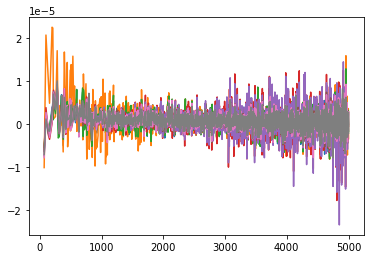

In [97]:
for typ in ['T', 'QU', 'TQU']:
    for est in ['qe', 'hdvqe', 'it']:
        if not (est=='hdvqe' and typ=='QU'):
            pl.plot(ls, np.mean(dat[typ][est], axis=0)[ls])
#             pl.loglog()
            

In [85]:
covs = {}
covs_bnd = {}
diag_var = {}
diag_var_bnd = {}

for typ in ['T', 'QU', 'TQU']:
    covs[typ] = {}
    covs_bnd[typ] = {}
    diag_var[typ] = {}
    diag_var_bnd[typ] = {}
    
    for est in ['qe', 'hdvqe', 'it']:
        if not (est=='hdvqe' and typ=='QU'):
            covs[typ][est] = np.cov(dat[typ][est].T)
            covs_bnd[typ][est] = np.cov(bnd_dat[typ][est].T)
            diag_var[typ][est] = np.var(dat[typ][est], axis=0)
            diag_var_bnd[typ][est] = np.var(bnd_dat[typ][est], axis=0)
            

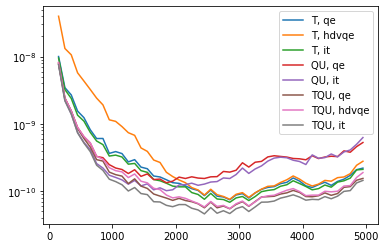

In [98]:
for typ in ['T', 'QU', 'TQU']:
    for est in ['qe', 'hdvqe', 'it']:
        if not (est=='hdvqe' and typ=='QU'):
#             pl.loglog(ls, diag_var[typ][est][ls], label=f"{typ}, {est}")
#             pl.loglog(ellb, diag_var_bnd[typ][est], label=f"{typ}, {est}")
            pl.semilogy(ellb, np.diag(covs_bnd[typ][est]), label=f"{typ}, {est}")
            
pl.legend()

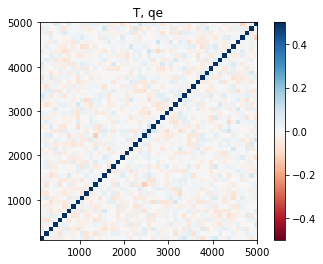

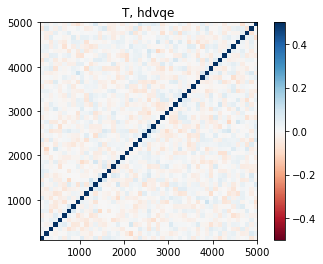

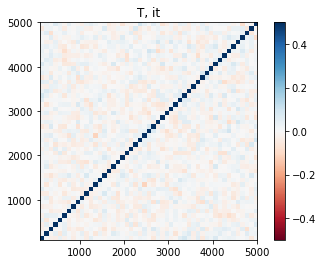

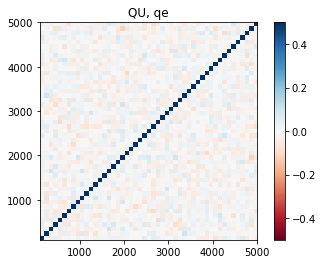

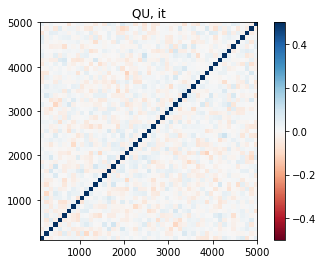

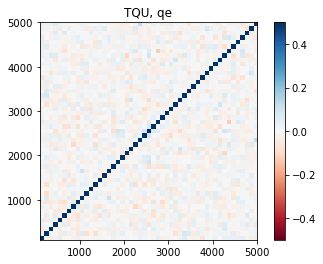

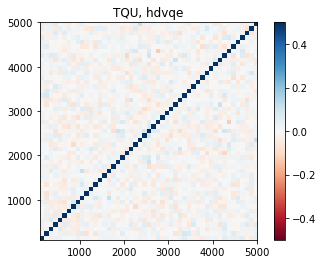

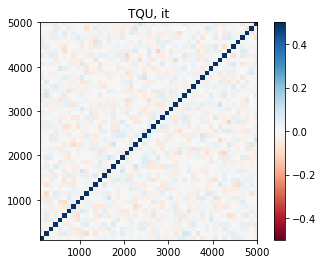

In [92]:
for typ in ['T', 'QU', 'TQU']:
    for est in ['qe', 'hdvqe', 'it']:
        if not (est=='hdvqe' and typ=='QU'):
            pl.figure()
            pl.title(f"{typ}, {est}")
            pl.imshow(cov_to_corr(covs_bnd[typ][est]), vmin=-0.5, vmax=0.5, cmap='RdBu', origin='lower', extent=[lmin,lmax, lmin,lmax])
            pl.colorbar()
            pl.savefig(f'plots/corr_{typ}_{est}_lmax5000.pdf', bbox_inches='tight')